In [ ]:
# ..... homogenize labels ..... #

In [2]:
library(Seurat)
library(dplyr)
library(ggplot2)

In [3]:
# load data
sc1 = readRDS('chicken_integrated_ssSTACAS.rds')
DefaultAssay(sc1) <- 'RNA'
sc1@meta.data[1,]

orig.ident nCount_RNA nFeature_RNA species
stage23_sample3_AAACCCAAGTAACAGT-1 stage23    5044       2506         chicken
                                   dataset         consensus_type  
stage23_sample3_AAACCCAAGTAACAGT-1 stage23_sample3 Endothelial_cell
                                   integrated_snn_res.1 seurat_clusters
stage23_sample3_AAACCCAAGTAACAGT-1 12                   12

In [5]:
levels(sc1$seurat_clusters)

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29"
[31] "30" "31" "32"

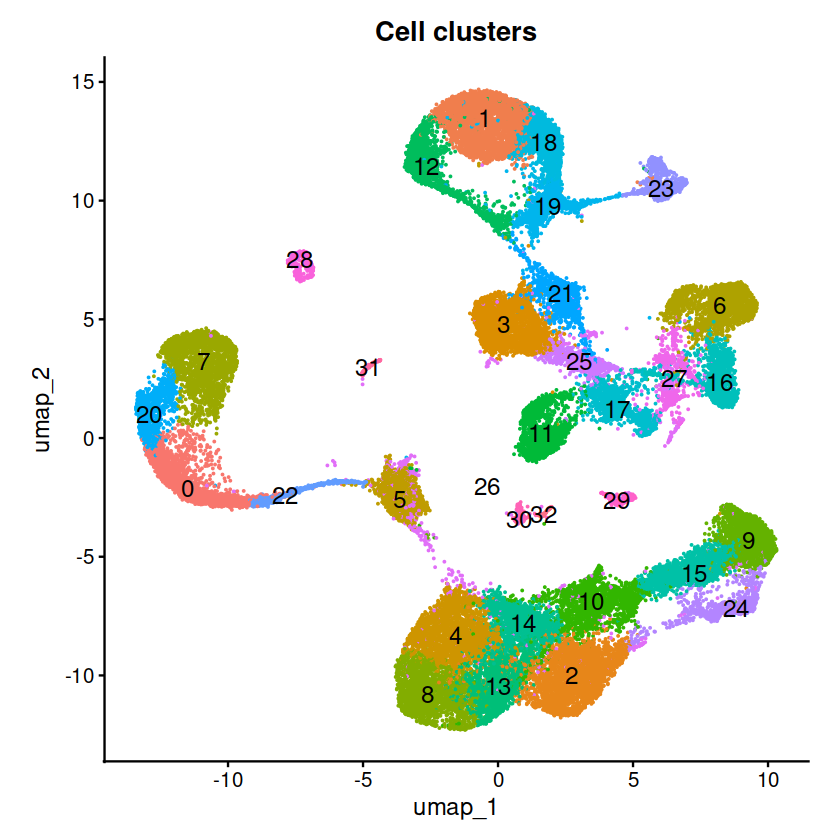

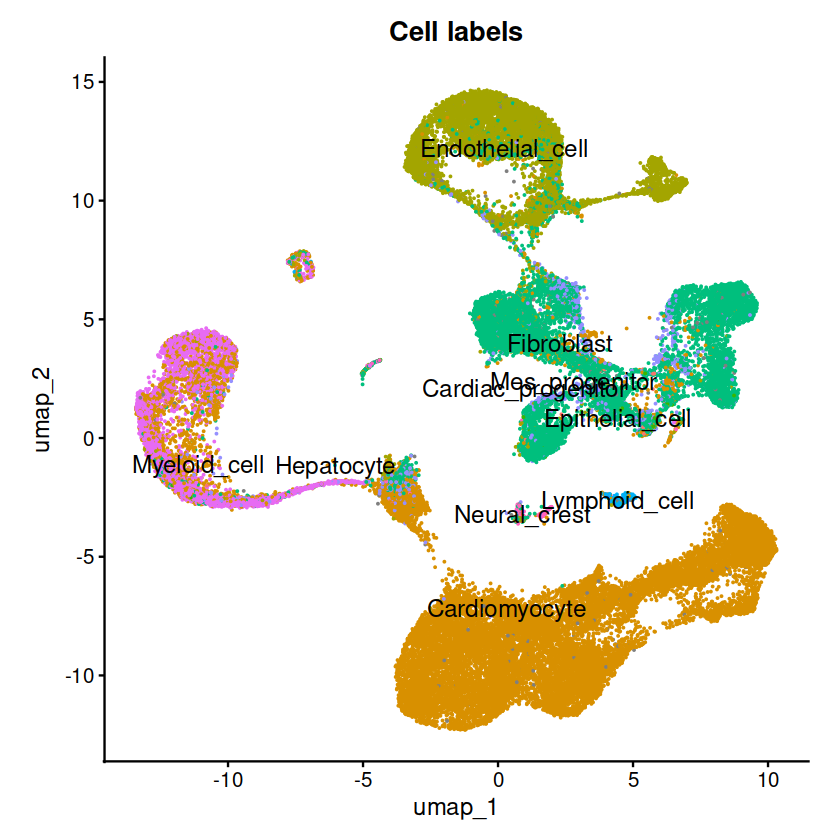

In [5]:
DimPlot(sc1, group.by = 'seurat_clusters', label=T, label.size = 5) + NoLegend() + 
theme(aspect.ratio = 1) + ggtitle("Cell clusters")
DimPlot(sc1, group.by = 'consensus_type', label=T, label.size = 5) + NoLegend() +
theme(aspect.ratio = 1) + ggtitle("Cell labels")

In [6]:
# get markers for each cluster
markers1 <- FindAllMarkers(sc1, only.pos = TRUE)
head(markers1)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24

Calculating cluster 25

Calculating cluster 26

Calculating cluster 27

Calculating cluster 28

Calculating cluster 29

Calculating cluster 30

Calculating cluster 31

Calculating cluster 32



p_val avg_log2FC pct.1 pct.2 p_val_adj cluster
CA13               0     3.636064   0.840 0.161 0         0      
TUBB1              0     3.423362   0.612 0.133 0         0      
SLC4A1             0     3.211421   0.654 0.185 0         0      
ENSGALG00010021710 0     4.004000   0.494 0.070 0         0      
ENSGALG00010001729 0     3.157570   0.556 0.145 0         0      
GAB3               0     2.808870   0.628 0.218 0         0      
                   gene              
CA13               CA13              
TUBB1              TUBB1             
SLC4A1             SLC4A1            
ENSGALG00010021710 ENSGALG00010021710
ENSGALG00010001729 ENSGALG00010001729
GAB3               GAB3

In [4]:
# load list of orthologs
om = read.delim('mouse_chicken_orthologs_biomart.txt', sep = '\t')
colnames(om) <- c('mouse', 'chicken', 'LCA', 'homology_type')
om <- om[om[,1]!='' & om[,2]!='' & om$homology_type=='ortholog_one2one',]
dim(om)
om[1,]

ven = read.delim('~/septation/additional_data/DE_genes_RVvsLV.txt', sep = ',')
dim(ven)
ven[1:3,]

[1] 12287     4

mouse  chicken LCA     homology_type   
6 mt-Nd1 ND1     Amniota ortholog_one2one

[1] 41  7

Gene               logFC     logCPM   PValue       FDR          upreg_in_RV
1 ENSMUSG00000020427 2.2003493 7.403434 6.622454e-30 1.387404e-26 1          
2 ENSMUSG00000003477 1.3868295 7.032664 7.866222e-14 8.239867e-11 1          
3 ENSMUSG00000033965 0.7028235 7.609180 3.006863e-10 1.574844e-07 1          
  Symbol 
1 IGFBP3 
2 INMT   
3 SLC16A2

In [12]:
rv = ven$Symbol[ven$upreg_in_RV==1]
# rv <- om$chicken[match(rv, om$mouse)]
rv <- rv[!is.na(rv)]

lv = ven$Symbol[ven$upreg_in_RV!=1]
# lv <- om$chicken[match(lv, om$mouse)]
lv <- lv[!is.na(lv)]

In [67]:
# rv vs lv markers?
list1 = markers1$gene[markers1$cluster=='10']
match(rv, list1[1:200])
match(lv, list1[1:200])

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

In [68]:
cls1 = '10'
list1 = markers1$gene[markers1$cluster==cls1]
list1[1:100]
table(sc1$consensus_type[sc1$seurat_clusters==cls1])

[1] "LRRTM3"             "LDB3"               "PEX5L"             
  [4] "HHLA2"              "RGS6"               "MYH7B"             
  [7] "TRIM55"             "KIF26B"             "SLC8A1"            
 [10] "IL1RAPL2"           "RBM20"              "CHRM2"             
 [13] "PLEKHA7"            "BMP5"               "ENSGALG00010021609"
 [16] "PALM2AKAP2.1"       "STC2"               "MYBPC3"            
 [19] "ACTN2"              "KCNQ1"              "KIRREL3"           
 [22] "FGF14"              "ENSGALG00010008041" "PPARGC1A"          
 [25] "MYOM1"              "SMPX"               "NSMF"              
 [28] "UNC5C"              "CACNA1C"            "PDE1C"             
 [31] "NEBL"               "GPA33"              "ZNF536"            
 [34] "RBM24"              "CADM1"              "SHROOM3"           
 [37] "CTNNA3"             "FHOD3"              "RCAN2"             
 [40] "TRDN"               "RYR2"               "CACNA1D"           
 [43] "ANK2"               "CMSS1"              "PHLPP1"            
 [46] "DMD"                "CACNA2D1"           "NEO1"              
 [49] "CPNE9"              "SMYD1"              "TNNI3K"            
 [52] "MYH15"              "ATP13A3"            "CDH2"              
 [55] "HCN4"               "CACNA1H"            "HECW1"             
 [58] "PTPRK"              "SORBS1"             "PALLD"             
 [61] "USP13"              "FGF13"              "NLGN1"             
 [64] "ENSGALG00010021078" "PCDH15"             "TBX2"              
 [67] "MTNR1A"             "CAMKK1"             "BRINP3"            
 [70] "COLQ"               "RGS7"               "PLPP4"             
 [73] "ATP1B1"             "ZFPM2"              "MLIP"              
 [76] "SCUBE1"             "MYO16"              "ADCY6"             
 [79] "TPM2"               "MSX2"               "B3GALNT1"          
 [82] "RIMBP2"             "STXBP6"             "TTN"               
 [85] "PRDM16"             "OBSCN"              "SORBS2"            
 [88] "SVIL"               "EML5"               "LMOD2"             
 [91] "PLCB1"              "MYL3"               "HDAC9"             
 [94] "SLC4A7"             "MYL1"               "CDH12"             
 [97] "SH3PXD2A"           "COL19A1"            "ENSGALG00010024234"
[100] "SYDE2"


Cardiomyocyte    Fibroblast 
         1895             1 

Warning message:
“The following requested variables were not found: MYH6”


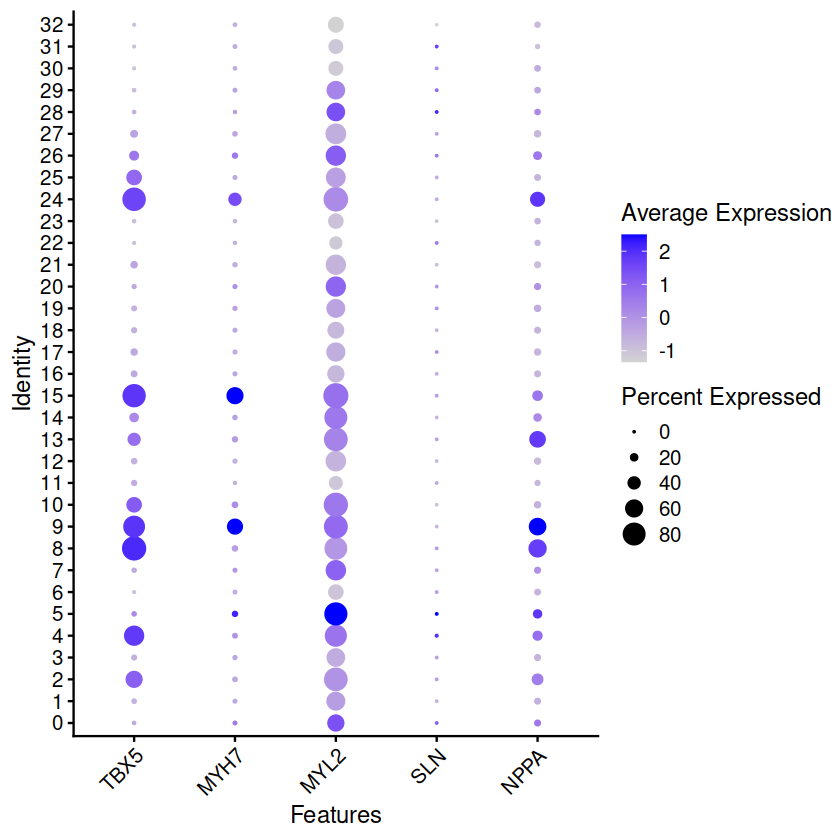

In [17]:
# marker exp - CMs
# 8,13,14,10,15,9,24
DotPlot(sc1, features = c('TBX5', 'MYH7', 'MYH6', 'MYL2', 'SLN', 'NPPA'), group.by = "seurat_clusters") + RotatedAxis()

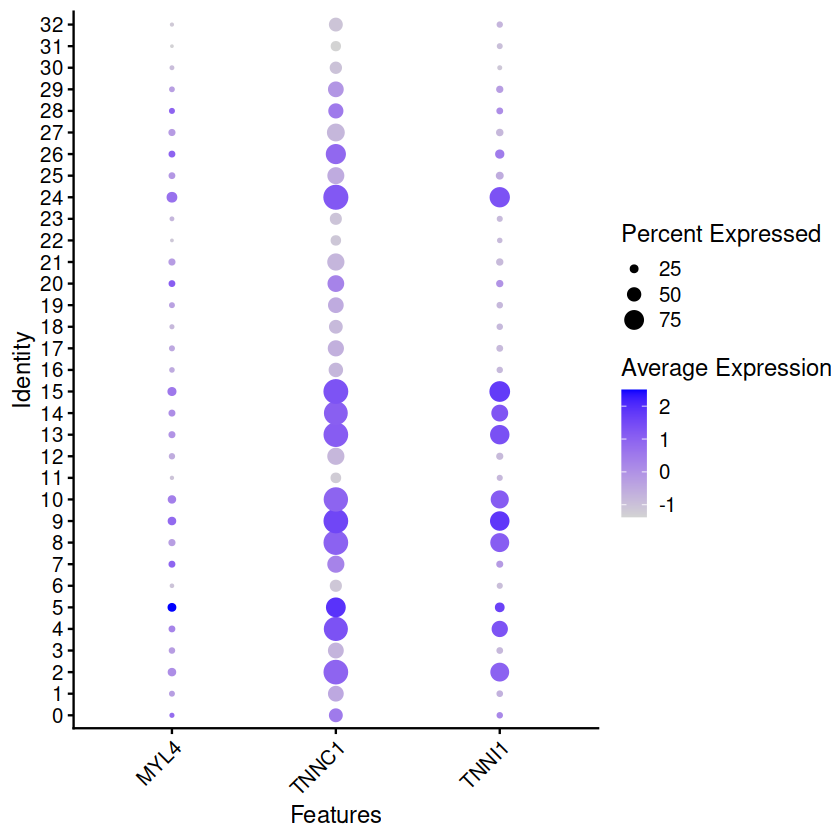

In [18]:
# immature CMs
DotPlot(sc1, features = c('MYL4', 'TNNC1', 'TNNI1'), group.by = "seurat_clusters") + RotatedAxis()

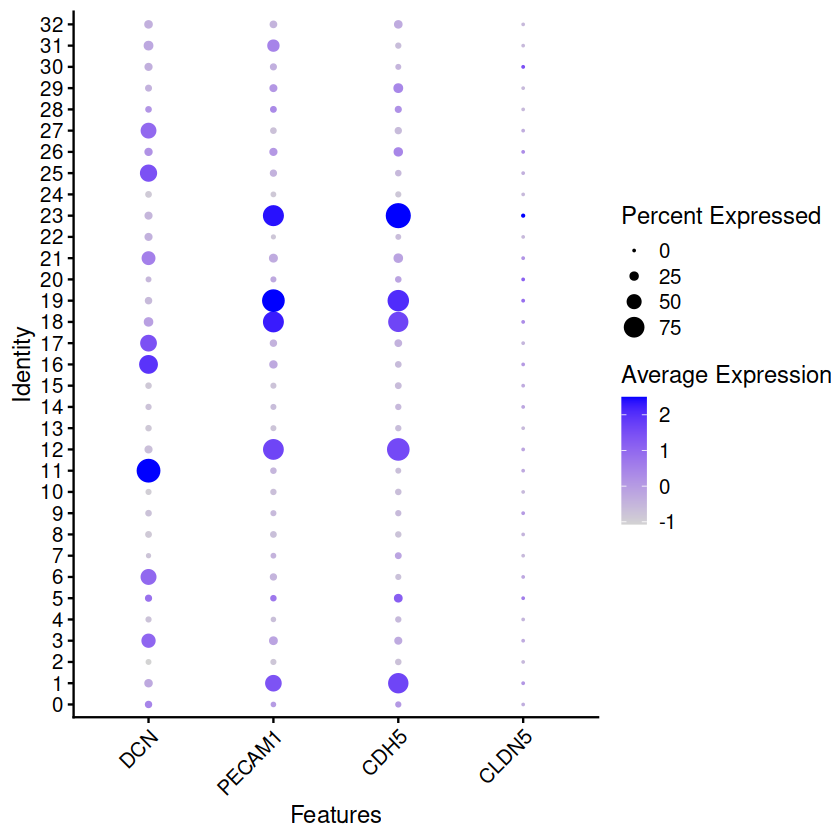

In [19]:
# fibro, endo
DotPlot(sc1, features = c('DCN', 'PECAM1', 'CDH5', 'CLDN5'), group.by = "seurat_clusters") + RotatedAxis()

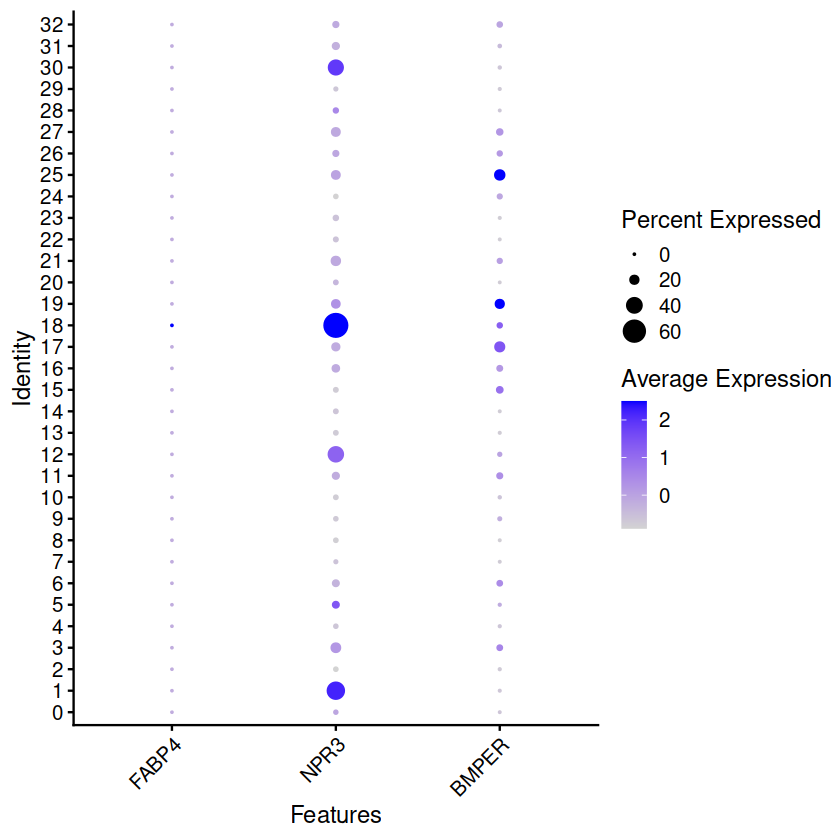

In [20]:
# vascular endothelial vs endocardial
DotPlot(sc1, features = c('FABP4', 'NPR3', 'BMPER'), group.by = "seurat_clusters") + RotatedAxis()

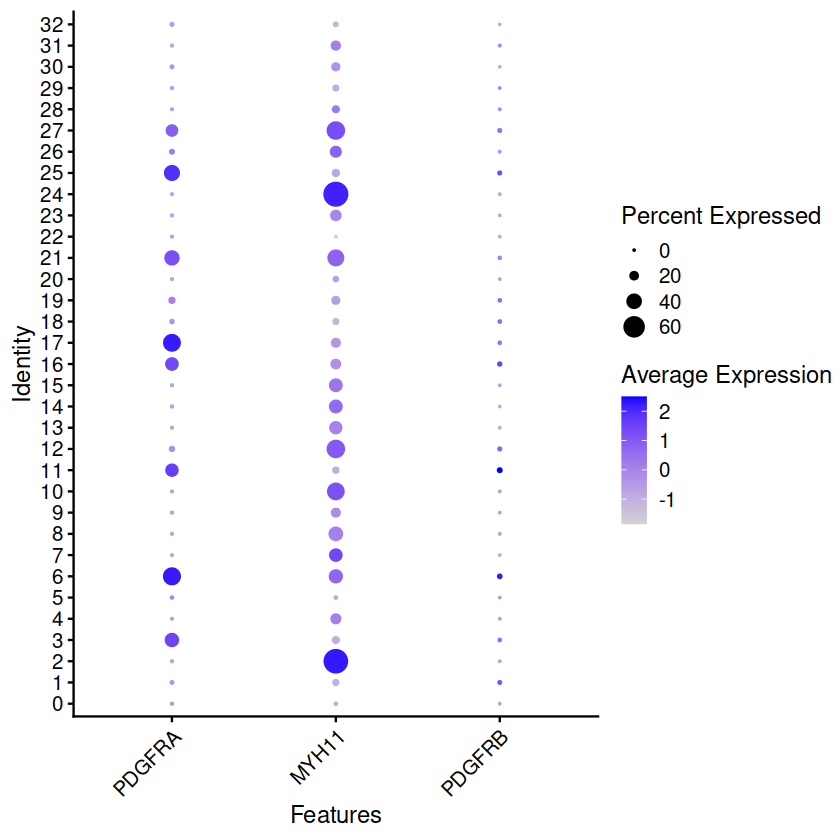

In [21]:
# mural, smc, pericyte
DotPlot(sc1, features = c('PDGFRA', 'MYH11', 'PDGFRB'), group.by = "seurat_clusters") + RotatedAxis()

Warning message:
“The following requested variables were not found: KRT19”


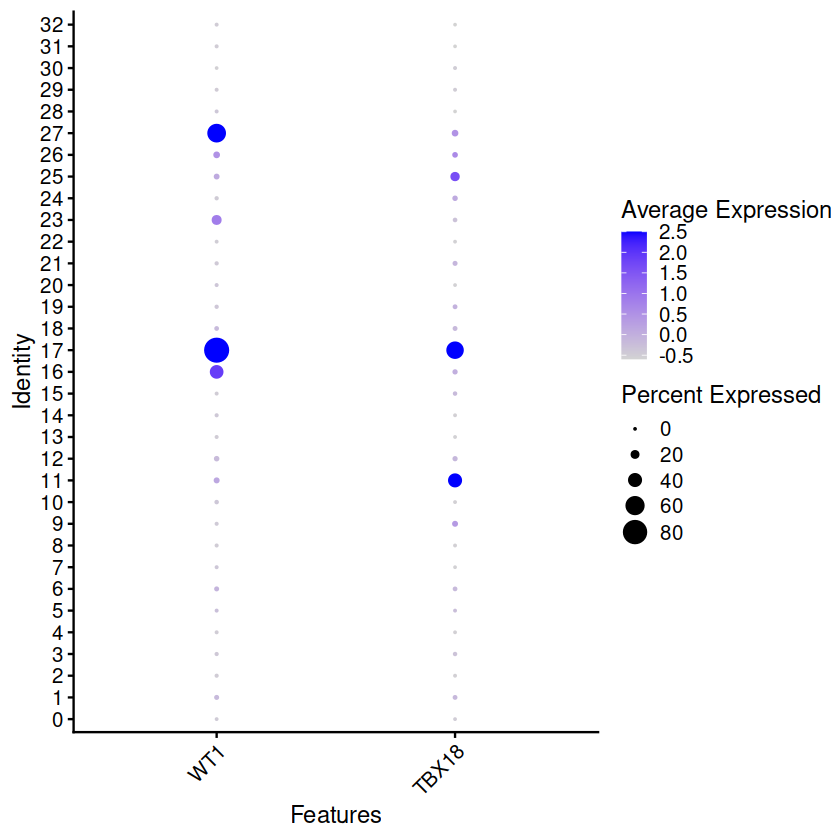

In [22]:
# epicardial
DotPlot(sc1, features = c('KRT19', 'WT1', 'TBX18'), group.by = "seurat_clusters") + RotatedAxis()

Warning message:
“The following requested variables were not found: CD41, CD71”


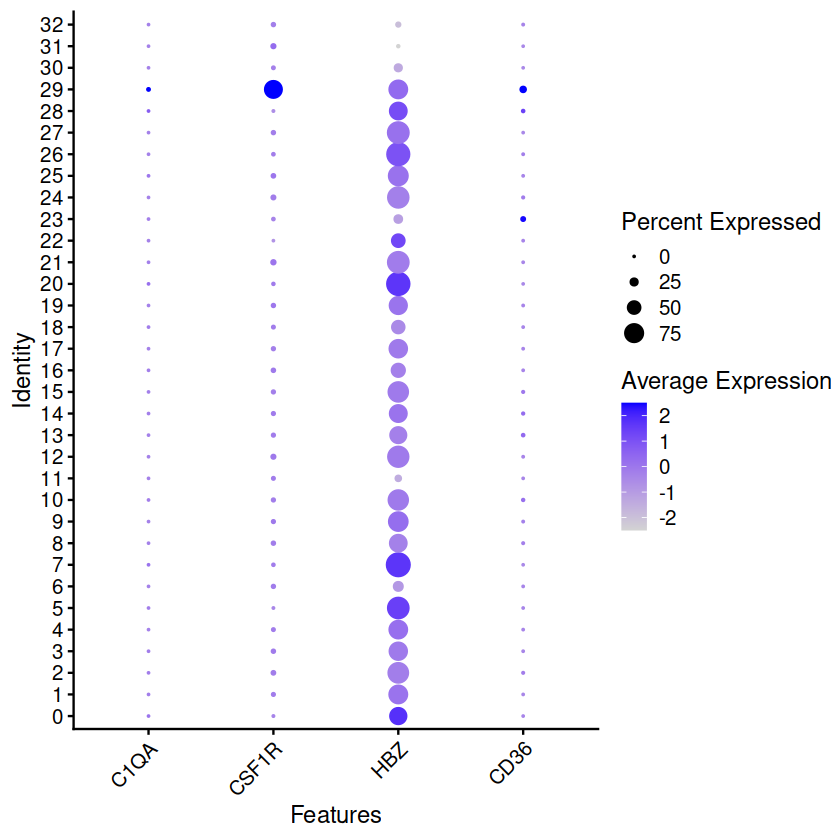

In [23]:
# blood, immune
DotPlot(sc1, features = c('C1QA', 'CSF1R', 'CD41', 'HBZ', 'CD36', 'CD71'), group.by = "seurat_clusters") + RotatedAxis()

In [ ]:
# ..... plot marker exp ..... #

In [3]:
# load integrated data
library(viridis)
sc1 = readRDS('chicken_integrated_ssSTACAS.rds')
dim(sc1)
sc1@meta.data[1,]

Loading required package: viridisLite



[1]  3000 72898

orig.ident nCount_RNA nFeature_RNA species
stage23_sample3_AAACCCAAGTAACAGT-1 stage23    5044       2506         chicken
                                   dataset         consensus_type  
stage23_sample3_AAACCCAAGTAACAGT-1 stage23_sample3 Endothelial_cell
                                   integrated_snn_res.1 seurat_clusters
stage23_sample3_AAACCCAAGTAACAGT-1 12                   12

In [4]:
# get harmonised labels
tab1 = read.delim('chicken_ssSTACAS_celltypes.txt', sep = '\t')
tab1[1,]

sc1$stage = sc1$orig.ident
sc1$broad_type = tab1$subtype[match(sc1$seurat_clusters, tab1$cluster)]
sc1$cluster = tab1$label[match(sc1$seurat_clusters, tab1$cluster)]
sc1$ctypes <- sub('\\_.*', '', sc1$cluster)
sc1@meta.data[1,]

species cluster celltype subtype     label         cluster_new
1 chicken 0       CM       immature CM immature-CM_1 c1

orig.ident nCount_RNA nFeature_RNA species
stage23_sample3_AAACCCAAGTAACAGT-1 stage23    5044       2506         chicken
                                   dataset         consensus_type  
stage23_sample3_AAACCCAAGTAACAGT-1 stage23_sample3 Endothelial_cell
                                   integrated_snn_res.1 seurat_clusters stage  
stage23_sample3_AAACCCAAGTAACAGT-1 12                   12              stage23
                                   broad_type  cluster       ctypes     
stage23_sample3_AAACCCAAGTAACAGT-1 endocardial endocardial_4 endocardial

In [5]:
sc1$ctypes[sc1$ctypes=='immature-blood'] = 'blood'

In [6]:
# cell type order
ctype_order = c('vCM', 'aCM', 'immature-CM', 'endothelial', 'endocardial', 'epicardial',
                'fibroblast', 'SMC', 'pericyte', 'neural-crest', 'blood', 'macrophage')

DefaultAssay(sc1) <- 'RNA'
sc1$ctypes = factor(sc1$ctypes, levels = rev(ctype_order))
Idents(sc1) <- 'ctypes'

In [11]:
gene_list = c('TBX5', 'ACTN2', 'MYL2', 'IRX4', 'MYL4', 'TNNC1', 
              'PECAM1', 'CDH5', 'NPR3', 'WT1', 'TBX18',
              'DCN', 'POSTN', 'PDGFRA', 'ACTA2', 'PDGFRB',               
              'NRXN1', 'SLC4A1', 'CD24', 'CSF1R')
# DotPlot(sc1, features = gene_list, group.by = "ctypes") #+ coord_flip()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


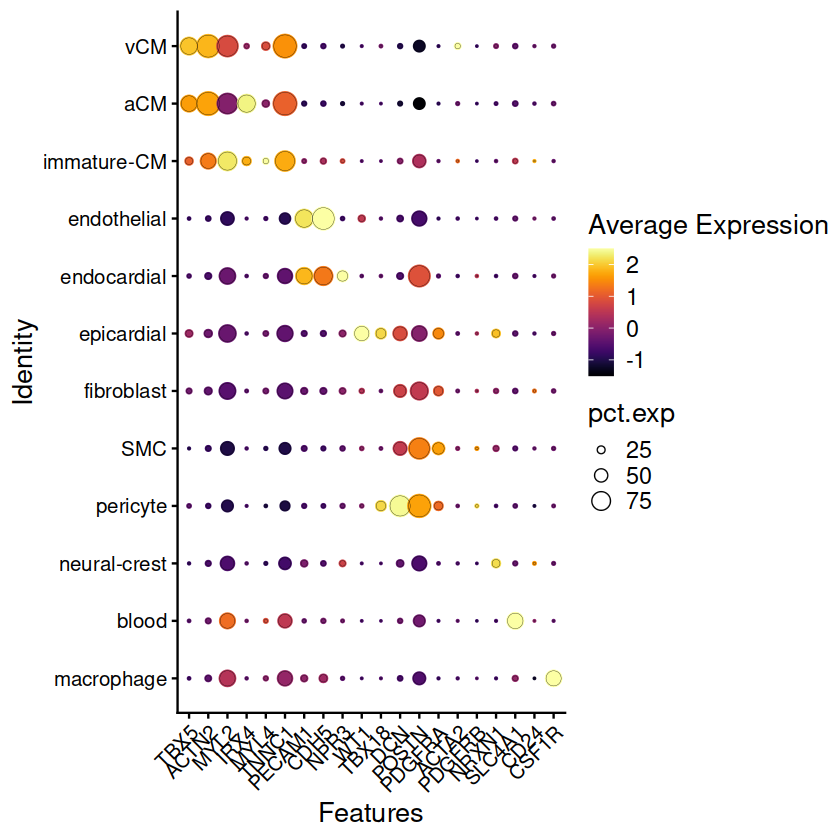

In [13]:
# png('aa-chicken-marker-exp-dotplot.png', width = 11, height = 5, res = 300, units = 'in')
DotPlot(sc1, features = gene_list) +
  geom_point(aes(size=pct.exp), shape = 21, colour="black", stroke=0.1) +
  scale_colour_viridis(option="inferno") +
  guides(size=guide_legend(override.aes=list(shape=21, colour="black", fill="white"))) +
theme(text = element_text(size = 16), axis.text.x = element_text(angle = 45, hjust = 1)) 
# dev.off()